# Forward Propagation in Neural Networks

What is Forward Propagation?
Forward propagation is the process where a neural network transforms input data into predictions or outputs. Think of it as the “thinking” phase of a neural network — when shown an input (like an image or text), forward propagation is how the network processes that information through its layers to produce a result.

In technical terms, it’s the sequential calculation that moves data from the input layer, through hidden layers, and finally to the output layer. During this journey, the data is transformed by weighted connections and activation functions, allowing the network to capture complex patterns.

# Foundations of Forward Propagation
To understand forward propagation, we need to start with its fundamental building blocks. Let’s begin with the smallest unit of computation in neural networks and gradually build up to more complex structures.

# The single neuron: where it all begins
The neural network’s journey begins with a fascinating parallel to biology. Just as the human brain consists of billions of interconnected neurons, artificial neural networks are built from mathematical models inspired by these biological cells.

![Basic Concept](https://media.datacamp.com/cms/ad_4nxeph0yqjhbhynpbqqn9h0ea5fxhhg3mrhqh1qrbks3i26ntoemna-jlfiefwrpwwrow9du0jifeqirebxjmlp4q3wpkrmoyajsojlax5ot7owe1eopkdpd1ybhzhlvr09jijrhdsw.png)

A biological neuron receives signals from other neurons through dendrites, processes these signals in its cell body, and then transmits the result through the axon to other neurons. In our computational model, we mirror this process with:

# Inputs:
The signals coming into the neuron (like dendrites receiving signals).
# Weights:
The importance assigned to each input (analogous to the strength of synaptic connections).
# Bias:
An additional parameter that helps the neuron activate or remain dormant regardless of inputs.
# Activation function:
Determines whether and how strongly the neuron “fires” based on its inputs (similar to the cell body deciding whether to generate an action potential).
# Output:
The signal sent to the next layer (like the axon transmitting to other neurons).

![Single Neuron](https://media.datacamp.com/cms/ad_4nxfqjs0gtbmxh4eygjrhsd9nzlxy-x-job22qyzimv1pl4y-h9tu8jsqvylfosjdo9rjau3youcuqo4uobpqzvua1ba4djhgzogjoyq33ems4luznl6ae5rxmooabijk6izq8wkeqw.png)

Mathematical foundation of a single neuron
The operation of a neuron can be described with a straightforward equation

![X](https://media.datacamp.com/cms/ad_4nxedlktwszhsgriz_tct0pp7qki1w-vro_gbzeblf9bkvpnziofaxddeslzm0yceswgcsz9laedsmk_sced5vvulzpjev5xlteqzvb1bepc2keofvghmffxktqwk96rfnuwncbth.png)

x is our input vector [x_1, x_2, x_3, …]

w is our weight vector [w_1, w_2, …, w_n]

b is the bias (a single scalar value)

z is the weighted sum plus bias (often called the “pre-activation” or “logit”)

f is the activation function

a is the final output of the neuron

From neurons to layers
Individual neurons are powerful, but the true strength of neural networks emerges when neurons are organized into layers. A layer is simply a collection of neurons that process inputs in parallel. There are typically three types of layers in a neural network:


Input layer: Receives the raw data and passes it to the next layer

Hidden layers: Process information from previous layers

Output layer: Produces the final prediction or classification

**Multi-layer networks: the complete picture**
A full neural network consists of an input layer, one or more hidden layers, and an output layer. The term “deep” in deep learning refers to networks with multiple hidden layers. Each layer transforms the data in increasingly abstract ways, allowing the network to learn complex representations.

**Let’s consider a simple neural network with:**

An input layer with 4 features

Two hidden layers with 3 and 2 neurons, respectively

An output layer with 3 neurons (perhaps for multi-class classification)

![](https://media.datacamp.com/cms/ad_4nxex4dc12ys0ui-x4a7d6ji57s5sioosaigtfrdaeg-gttck4xmck_paurdim9br2kqnrznptzw1i8_blo-qyovkrz3j10sfqba-t8cz44heisf_xql2ynko5ic8ldwrm64a2cd4ra.png)

# Forward propagation algorithm
Let’s formalize the forward propagation process into an algorithm. For a neural network with L layers, forward propagation follows these steps:

In [1]:
# Pseudocode for forward propagation
def forward_propagation(X, parameters):
   """
   X: Input data (batch_size, n_features)
   parameters: Dictionary containing weights and biases for each layer
   Returns: The final output and all intermediate activations
   """
   # Store all activations for later use (e.g., in backpropagation)
   activations = {'A0': X}  # A0 is the input
  
   # Loop through L-1 layers (excluding the output layer)
   for l in range(1, L):
       # Get previous activation
       A_prev = activations[f'A{l-1}']
      
       # Get weights and biases for current layer
       W = parameters[f'W{l}']
       b = parameters[f'b{l}']
      
       # Compute pre-activation
       Z = np.dot(A_prev, W.T) + b
      
       # Apply activation function (e.g., ReLU for hidden layers)
       A = relu(Z)
      
       # Store values for later use
       activations[f'Z{l}'] = Z
       activations[f'A{l}'] = A
  
   # Compute output layer (layer L)
   A_prev = activations[f'A{L-1}']
   W = parameters[f'W{L}']
   b = parameters[f'b{L}']
  
   # Compute pre-activation for output layer
   Z = np.dot(A_prev, W.T) + b
  
   # Apply output activation function (depends on the task)
   if task == 'binary_classification':
       A = sigmoid(Z)
   elif task == 'multiclass_classification':
       A = softmax(Z)
   elif task == 'regression':
       A = Z  # Linear activation
  
   # Store output layer values
   activations[f'Z{L}'] = Z
   activations[f'A{L}'] = A
  
   return A, activations

This algorithm highlights several important aspects of forward propagation:

Sequential processing: Information flows strictly forward, layer by layer.
Activation storage: We store not just the final output but all intermediate activations, which will be crucial for training the network using backpropagation.
Task-specific output: The activation function for the output layer is chosen based on the specific problem (classification vs. regression).
The forward propagation algorithm is remarkably simple, yet it allows neural networks to approximate incredibly complex functions. When combined with proper training through backpropagation, this simple process enables the network to learn from data and make increasingly accurate predictions.

Let’s trace through a specific example to further solidify our understanding. Consider input X = [0.5, -0.2, 0.1] going through our example network with:

Hidden layer weights W^[1] (4×3 matrix) and biases b^[1] (vector of 4 values)

Output layer weights W^[2] (2×4 matrix) and biases b^[2] (vector of 2 values)

For simplicity, let’s say all weights are 0.1 and all biases are 0:

# Implementing Forward Propagation in Python
Now that we understand the theory behind forward propagation, let’s put it into practice by implementing it in Python. We’ll start with a “from scratch” implementation using only NumPy, then see how modern deep learning frameworks simplify this process.

# Building from scratch with NumPy
NumPy provides efficient array operations that allow us to implement the matrix calculations we’ve discussed. Let’s build a simple neural network class that performs forward propagation through multiple layers.

First, we’ll need to import the necessary libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

In [3]:
def relu(Z):
   """ReLU activation function: max(0, Z)"""
   return np.maximum(0, Z)

def sigmoid(Z):
   """Sigmoid activation function: 1/(1 + e^(-Z))"""
   return 1 / (1 + np.exp(-Z))

def softmax(Z):
   """Softmax activation function for multi-class classification"""
   # Subtract max for numerical stability (prevents overflow)
   exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
   return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

In [4]:
class NeuralNetwork:
   def __init__(self, layer_dims, activations):
       """
       Initialize a neural network with specified layer dimensions and activations
      
       Parameters:
       - layer_dims: List of integers representing the number of neurons in each layer
                    (including input and output layers)
       - activations: List of activation functions for each layer (excluding input layer)
       """
       self.L = len(layer_dims) - 1  # Number of layers (excluding input layer)
       self.layer_dims = layer_dims
       self.activations = activations
       self.parameters = {}
      
       # Initialize parameters (weights and biases)
       self.initialize_parameters()
  
   def initialize_parameters(self):
       """Initialize weights and biases with small random values"""
       for l in range(1, self.L + 1):
           # He initialization for weights - helps with training deep networks
           self.parameters[f'W{l}'] = np.random.randn(self.layer_dims[l], self.layer_dims[l-1]) * np.sqrt(2 / self.layer_dims[l-1])
           self.parameters[f'b{l}'] = np.zeros((self.layer_dims[l], 1))
  
   def forward_propagation(self, X):
       """
       Perform forward propagation through the network
      
       Parameters:
       - X: Input data (n_features, batch_size)
      
       Returns:
       - AL: Output of the network
       - caches: Dictionary containing all activations and pre-activations
       """
       caches = {}
       A = X  # Input layer activation
       caches['A0'] = X
      
       # Process through L-1 layers (excluding output layer)
       for l in range(1, self.L):
           A_prev = A
          
           # Get weights and biases for current layer
           W = self.parameters[f'W{l}']
           b = self.parameters[f'b{l}']
          
           # Forward propagation for current layer
           Z = np.dot(W, A_prev) + b
          
           # Apply activation function
           activation_function = self.activations[l-1]
           if activation_function == "relu":
               A = relu(Z)
           elif activation_function == "sigmoid":
               A = sigmoid(Z)
          
           # Store values for backpropagation
           caches[f'Z{l}'] = Z
           caches[f'A{l}'] = A
      
       # Output layer
       W = self.parameters[f'W{self.L}']
       b = self.parameters[f'b{self.L}']
       Z = np.dot(W, A) + b
      
       # Apply output activation function
       activation_function = self.activations[self.L-1]
       if activation_function == "sigmoid":
           AL = sigmoid(Z)
       elif activation_function == "softmax":
           AL = softmax(Z)
       elif activation_function == "linear":
           AL = Z  # No activation for regression
      
       # Store output layer values
       caches[f'Z{self.L}'] = Z
       caches[f'A{self.L}'] = AL
      
       return AL, caches

The NeuralNetwork class we've implemented above provides a complete framework for creating and using a neural network with customizable architecture. Let's break down its key components:

Initialization: The network is configured with specified layer dimensions and activation functions. It automatically initializes weights and biases using the He initialization method for better training performance.
Forward propagation: The forward_propagation method we just implemented is the heart of the neural network's prediction capability. It:

Takes input data and passes it through each layer

Applies the appropriate activation function at each layer

Stores intermediate values in caches for later use in backpropagation

Returns both the final output and all cached values

3. Activation functions: The network supports multiple activation functions, including ReLU, sigmoid, and softmax, allowing it to handle different types of problems (regression or classification).

4. Flexible architecture: The implementation allows for networks of arbitrary depth and width, making it suitable for a wide range of machine learning tasks.

This implementation follows the standard neural network design pattern where data flows forward through the network, with each layer transforming the data before passing it to the next layer.

Now let’s test our implementation with a small example network:

In [5]:
# Create a sample network
# Input layer: 3 features
# Hidden layer 1: 4 neurons with ReLU activation
# Output layer: 2 neurons with sigmoid activation (binary classification)
layer_dims = [3, 4, 2]
activations = ["relu", "sigmoid"]
nn = NeuralNetwork(layer_dims, activations)

# Create sample input data - 3 features for 5 examples
X = np.random.randn(3, 5)

# Perform forward propagation
output, caches = nn.forward_propagation(X)

print(f"Input shape: {X.shape}")
print(f"Output shape: {output.shape}")
print(f"Output values:\n{output}")

Input shape: (3, 5)
Output shape: (2, 5)
Output values:
[[0.00386784 0.54343014 0.39661893 0.5        0.51056934]
 [0.11877049 0.32541093 0.44840699 0.5        0.45586633]]


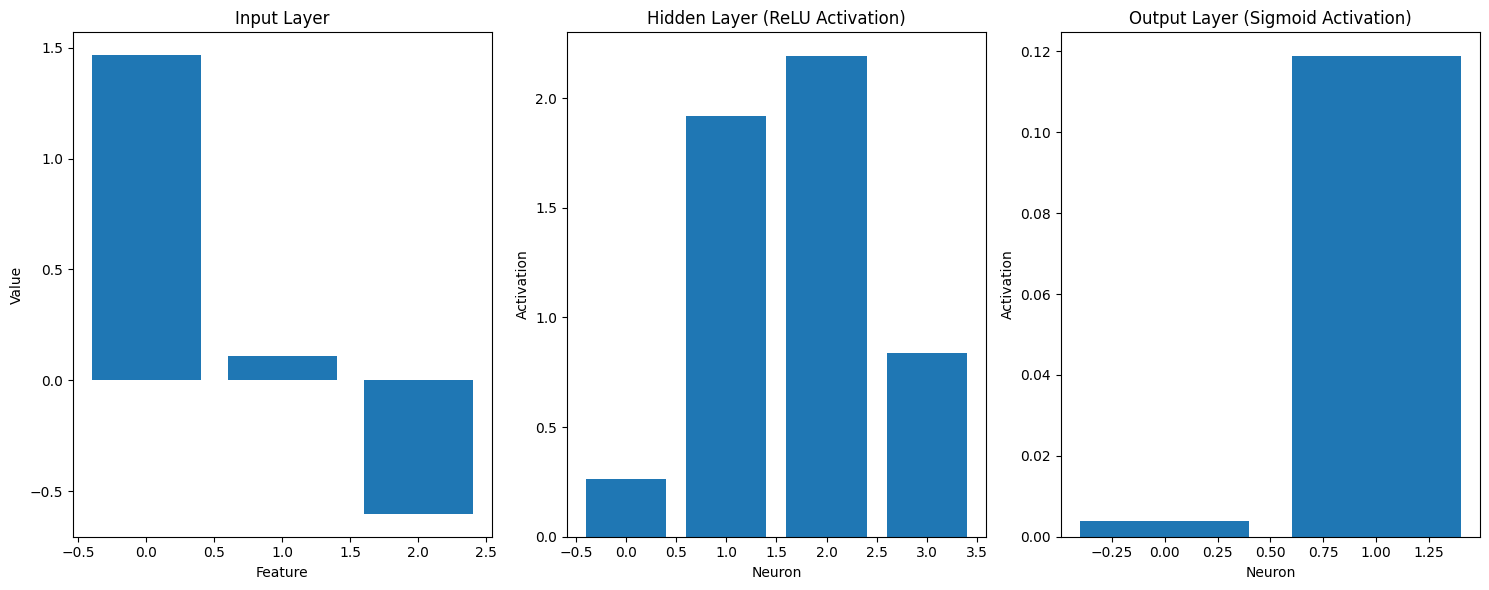

In [6]:
def visualize_activations(caches, example_idx=0):
   """Visualize the activations for a single example through the network"""
   plt.figure(figsize=(15, 6))
  
   # Plot input
   plt.subplot(1, 3, 1)
   plt.bar(range(caches['A0'].shape[0]), caches['A0'][:, example_idx])
   plt.title('Input Layer')
   plt.xlabel('Feature')
   plt.ylabel('Value')
  
   # Plot hidden layer activation
   plt.subplot(1, 3, 2)
   plt.bar(range(caches['A1'].shape[0]), caches['A1'][:, example_idx])
   plt.title('Hidden Layer (ReLU Activation)')
   plt.xlabel('Neuron')
   plt.ylabel('Activation')
  
   # Plot output layer
   plt.subplot(1, 3, 3)
   plt.bar(range(caches['A2'].shape[0]), caches['A2'][:, example_idx])
   plt.title('Output Layer (Sigmoid Activation)')
   plt.xlabel('Neuron')
   plt.ylabel('Activation')
  
   plt.tight_layout()
   plt.show()

# Visualize the first example
visualize_activations(caches)

# Using deep learning frameworks

Now, let’s implement the same neural network using popular deep learning frameworks: TensorFlow and PyTorch. These frameworks optimize performance and provide higher-level abstractions, making it easier to build complex models.

First, let’s look at TensorFlow/Keras implementation:

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# For reproducibility
tf.random.set_seed(42)

# Create the same network architecture
tf_model = Sequential([
   Input(shape=(3,)),  # Input layer with 3 features
   Dense(4, activation='relu'),  # Hidden layer with 4 neurons
   Dense(2, activation='sigmoid')  # Output layer with 2 neurons
])

tf_model.summary()

2025-08-15 18:19:49.848519: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755281990.131110      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755281990.216525      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-15 18:20:08.556698: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (104.00 B)

 Trainable params: 26 (104.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Sample input data with the shape expected by Keras
X_tf = np.random.randn(5, 3)  # 5 examples, 3 features

# Forward propagation in TensorFlow
tf_output = tf_model.predict(X_tf)

print(f"TensorFlow output shape: {tf_output.shape}")
print(f"TensorFlow output values:\n{tf_output}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
TensorFlow output shape: (5, 2)
TensorFlow output values:
[[0.74263895 0.8302759 ]
 [0.75358677 0.82906216]
 [0.5        0.5       ]
 [0.66714966 0.74609697]
 [0.5        0.5       ]]


In [9]:
import torch
import torch.nn as nn

# For reproducibility
torch.manual_seed(42)

# Create a network in PyTorch
class PyTorchNN(nn.Module):
   def __init__(self):
       super(PyTorchNN, self).__init__()
       self.hidden = nn.Linear(3, 4)  # 3 inputs, 4 hidden neurons
       self.relu = nn.ReLU()
       self.output = nn.Linear(4, 2)  # 4 inputs from hidden, 2 outputs
       self.sigmoid = nn.Sigmoid()
  
   def forward(self, x):
       x = self.relu(self.hidden(x))
       x = self.sigmoid(self.output(x))
       return x

# Instantiate the model
torch_model = PyTorchNN()

# Print model structure
print(torch_model)

PyTorchNN(
  (hidden): Linear(in_features=3, out_features=4, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [14]:
# Sample input data
X_torch = torch.randn(5, 3)  # 5 examples, 3 features

# Forward propagation in PyTorch
torch_output = torch_model(X_torch)

print(f"PyTorch output shape: {torch_output.shape}")
print(f"PyTorch output values:\n{torch_output}")

PyTorch output shape: torch.Size([5, 2])
PyTorch output values:
tensor([[0.4516, 0.4116],
        [0.4289, 0.4267],
        [0.4278, 0.4172],
        [0.3771, 0.4321],
        [0.5769, 0.3328]], grad_fn=<SigmoidBackward0>)


In [15]:
# Compare dimensions and structure of outputs
print("\nComparison of implementations:")
print(f"NumPy output shape: {output.shape}")
print(f"TensorFlow output shape: {tf_output.shape}")
print(f"PyTorch output shape: {torch_output.shape}")


Comparison of implementations:
NumPy output shape: (2, 5)
TensorFlow output shape: (5, 2)
PyTorch output shape: torch.Size([5, 2])


# Complete Working Example

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


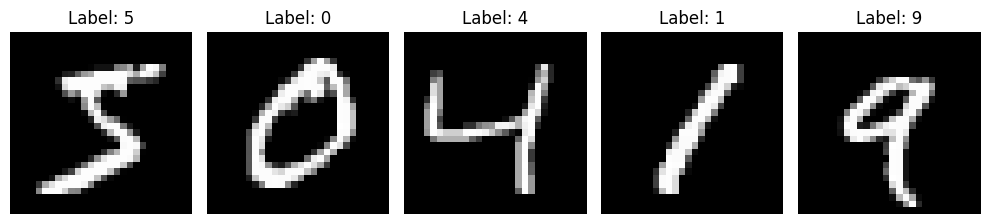

In [16]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape images to vectors (flatten 28x28 to 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1).T  # Shape: (784, 60000)
X_test_flat = X_test.reshape(X_test.shape[0], -1).T     # Shape: (784, 10000)

# Convert labels to one-hot encoding
def one_hot_encode(y, num_classes=10):
   one_hot = np.zeros((num_classes, y.size))
   one_hot[y, np.arange(y.size)] = 1
   return one_hot

y_train_one_hot = one_hot_encode(y_train)  # Shape: (10, 60000)
y_test_one_hot = one_hot_encode(y_test)    # Shape: (10, 10000)

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(5):
   plt.subplot(1, 5, i+1)
   plt.imshow(X_train[i], cmap='gray')
   plt.title(f"Label: {y_train[i]}")
   plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
# Define our network architecture
layer_dims = [784, 128, 10]
activations = ["relu", "softmax"]
nn = NeuralNetwork(layer_dims, activations)

# Take a small batch for demonstration
batch_size = 64
batch_indices = np.random.choice(X_train_flat.shape[1], batch_size, replace=False)
X_batch = X_train_flat[:, batch_indices]
y_batch = y_train_one_hot[:, batch_indices]

# Perform forward propagation
output, caches = nn.forward_propagation(X_batch)

# Compute accuracy
predictions = np.argmax(output, axis=0)
true_labels = np.argmax(y_batch, axis=0)
accuracy = np.mean(predictions == true_labels)

print(f"Batch accuracy: {accuracy:.4f}")

Batch accuracy: 0.0781


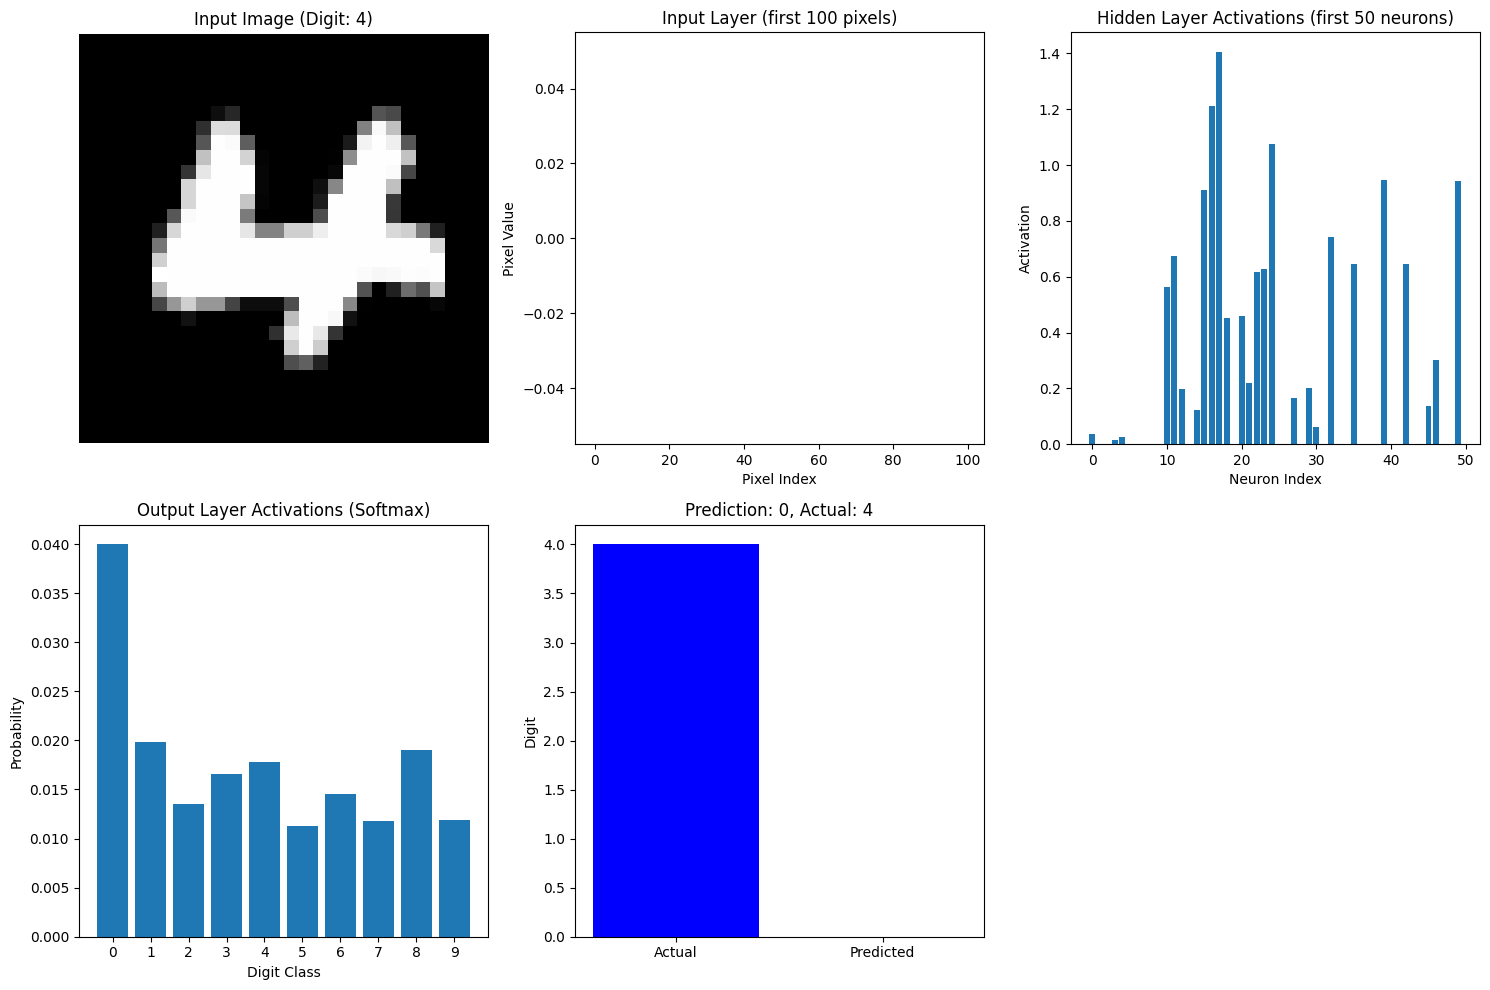

In [19]:
def visualize_network_processing(nn, image, label, caches):
   """Visualize network processing for a single image"""
   plt.figure(figsize=(15, 10))
  
   # Plot original image
   plt.subplot(2, 3, 1)
   plt.imshow(image.reshape(28, 28), cmap='gray')
   plt.title(f"Input Image (Digit: {label})")
   plt.axis('off')
  
   # Plot flattened input (first 100 values)
   plt.subplot(2, 3, 2)
   plt.bar(range(100), image.flatten()[:100])
   plt.title("Input Layer (first 100 pixels)")
   plt.xlabel("Pixel Index")
   plt.ylabel("Pixel Value")
  
   # Plot hidden layer activations (first 50 neurons)
   plt.subplot(2, 3, 3)
   hidden_activations = caches['A1'][:50, 0]
   plt.bar(range(len(hidden_activations)), hidden_activations)
   plt.title("Hidden Layer Activations (first 50 neurons)")
   plt.xlabel("Neuron Index")
   plt.ylabel("Activation")
  
   # Plot output layer activations
   plt.subplot(2, 3, 4)
   output_activations = caches['A2'][:, 0]
   plt.bar(range(10), output_activations)
   plt.xticks(range(10))
   plt.title("Output Layer Activations (Softmax)")
   plt.xlabel("Digit Class")
   plt.ylabel("Probability")
  
   # Plot prediction vs actual
   plt.subplot(2, 3, 5)
   prediction = np.argmax(output_activations)
   plt.bar(['Actual', 'Predicted'], [label, prediction], color=['blue', 'orange'])
   plt.title(f"Prediction: {prediction}, Actual: {label}")
   plt.ylabel("Digit")
  
   plt.tight_layout()
   plt.show()

# Visualize forward propagation for the first image in our batch
image_idx = 0
image = X_batch[:, image_idx].reshape(784, 1)
label = true_labels[image_idx]

visualize_network_processing(nn, image, label, caches)

The Relationship with Backpropagation
We’ve now explored forward propagation thoroughly, but this is only half of the story when it comes to neural networks. Let’s briefly examine how forward propagation connects with backpropagation, the algorithm that enables neural networks to learn.

Connecting forward and backward propagation
Forward propagation and backpropagation work as complementary processes in neural networks:

Forward propagation takes inputs and produces predictions, moving from left to right through the network.
Backpropagation takes errors and produces weight updates, moving from right to left through the network.